# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from scipy.stats import ks_2samp
import warnings


import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], na_values='?')
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [12]:
df =(df.dropna(axis=0))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   sex          297 non-null    float64
 2   cp           297 non-null    float64
 3   trestbps     297 non-null    float64
 4   chol         297 non-null    float64
 5   fbs          297 non-null    float64
 6   restecg      297 non-null    float64
 7   thalach      297 non-null    float64
 8   exang        297 non-null    float64
 9   oldpeak      297 non-null    float64
 10  slope        297 non-null    float64
 11  ca           297 non-null    float64
 12  thal         297 non-null    float64
 13  num          297 non-null    int64  
 14  flag_doente  297 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 37.1 KB


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [20]:
def cal_est(df, var_resposta, var_explicativa):
    
    tab = pd.crosstab(df[var_explicativa], df[var_resposta], margins=True)
    tab['Media_de_doentes'] = tab[1]/tab['All']
    tab['Odds'] = tab[1]/tab[0]
    tab['Odds_ratio'] = tab['Odds']/tab.loc['All','Odds']
    tab['Log_Odds'] = np.log(tab['Odds'])
    tab['Log_Odds_ratio'] = np.log(tab['Odds_ratio'])

    return tab

In [22]:
cal_est(df, 'flag_doente', 'cp')

flag_doente,0,1,All,Media_de_doentes,Odds,Odds_ratio,Log_Odds,Log_Odds_ratio
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.510949,-0.826679,-0.671486
2.0,40,9,49,0.183673,0.225000,0.262774,-1.491655,-1.336462
3.0,65,18,83,0.216867,0.276923,0.323414,-1.284016,-1.128823
4.0,39,103,142,0.725352,2.641026,3.084410,0.971167,1.126360
All,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


In [24]:
cal_est(df, 'flag_doente', 'slope')

flag_doente,0,1,All,Media_de_doentes,Odds,Odds_ratio,Log_Odds,Log_Odds_ratio
slope,,,,,,,,
1.0,103,36,139,0.258993,0.349515,0.408192,-1.051210,-0.896017
2.0,48,89,137,0.649635,1.854167,2.165450,0.617435,0.772628
3.0,9,12,21,0.571429,1.333333,1.557178,0.287682,0.442875
All,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


In [26]:
cal_est(df, 'flag_doente', 'thal')

flag_doente,0,1,All,Media_de_doentes,Odds,Odds_ratio,Log_Odds,Log_Odds_ratio
thal,,,,,,,,
3.0,127,37,164,0.225610,0.291339,0.340249,-1.233269,-1.078076
6.0,6,12,18,0.666667,2.000000,2.335766,0.693147,0.848340
7.0,27,88,115,0.765217,3.259259,3.806434,1.181500,1.336693
All,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [29]:
def cal_est_cat(df, var_explicativa, var_resposta):

   df['var_explicativa_cat'] = pd.qcut(df[var_explicativa].rank(method='first'), 5)
   tab = pd.crosstab(df['var_explicativa_cat'], df[var_resposta], margins=True)
   tab['Media_de_doentes'] = tab[1]/tab['All']
   tab['Odds'] = tab[1]/tab[0]
   tab['Odds_ratio'] = tab['Odds']/tab.loc['All','Odds']
   tab['Log_Odds'] = np.log(tab['Odds'])
   tab['Log_Odds_ratio'] = np.log(tab['Odds_ratio'])

   return tab

In [31]:
cal_est_cat(df,'age','flag_doente')

flag_doente,0,1,All,Media_de_doentes,Odds,Odds_ratio,Log_Odds,Log_Odds_ratio
var_explicativa_cat,,,,,,,,
"(0.999, 60.2]",46,14,60,0.233333,0.304348,0.355443,-1.189584,-1.034391
"(60.2, 119.4]",38,21,59,0.355932,0.552632,0.645409,-0.593064,-0.437871
"(119.4, 178.6]",29,30,59,0.508475,1.034483,1.208155,0.033902,0.189094
"(178.6, 237.8]",17,42,59,0.711864,2.470588,2.885359,0.904456,1.059649
"(237.8, 297.0]",30,30,60,0.500000,1.000000,1.167883,0.000000,0.155193
All,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [34]:
reglog = smf.logit(" flag_doente ~ C(sex) + C(cp) + trestbps + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.480667
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.3035
Time:                        18:52:23   Log-Likelihood:                -142.76
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.910e-24
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.3249      1.617     -5.149      0.000     -11.494      -5.156
C(sex)[T.1.0]     1.7989      0.352      5.112      0.000       1.109       2.489
C(cp)[T.2.0]     -0.0167      0.638     -0.026      0.979      -1.267       1.233
C(cp)[T.3.0]      0.1132      0.574      0.197      0.844      -1.011       1.238
C(cp)[T.4.0]      2.4547      0.553      4.443      0.000       1.372       3.538
trestbps          0.0192      0.009      2.255      0.024       0.003       0.036
age               0.0568      0.018      3.110      0.002       0.021       0.093
=================================================================================
"""

O sexo masculino possui uma chance maoir de doença cardíaca do que o sexo feminino. 

O CP que descreve o tipo de dor no peito,a dor angina atípica (2) possui menor chance de doença cardíaca do que a dor angina típica (1), porém essa variável não é significante nesse modelo. Os outros dois parâmetros possuem chances maiores, com a dor não-angina (3) não sendo significante para o modelo. 

A pressão sanguínea em repouso indica que a chance de doença cardíaca aumenta quando ela aumenta.

A idade indica que a chance de doença cardíaca aumenta quando ela aumenta.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [38]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,var_explicativa_cat,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(237.8, 297.0]",0.458086
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(237.8, 297.0]",0.942756
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(237.8, 297.0]",0.884350
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(0.999, 60.2]",0.139590
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(0.999, 60.2]",0.028736


In [40]:

cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

predito
(0.0139, 0.149]    61
(0.149, 0.29]      58
(0.29, 0.583]      59
(0.583, 0.819]     61
(0.819, 0.943]     58
Name: count, dtype: int64

In [42]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0139, 0.149]",61,0.075238
"(0.149, 0.29]",58,0.216382
"(0.29, 0.583]",59,0.440109
"(0.583, 0.819]",61,0.707344
"(0.819, 0.943]",58,0.874928


In [44]:
qualid['flag_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,flag_doente
predito,,,
"(0.0139, 0.149]",61,0.075238,0.081967
"(0.149, 0.29]",58,0.216382,0.155172
"(0.29, 0.583]",59,0.440109,0.508475
"(0.583, 0.819]",61,0.707344,0.737705
"(0.819, 0.943]",58,0.874928,0.827586


Text(0.5, 0, 'Grupo')

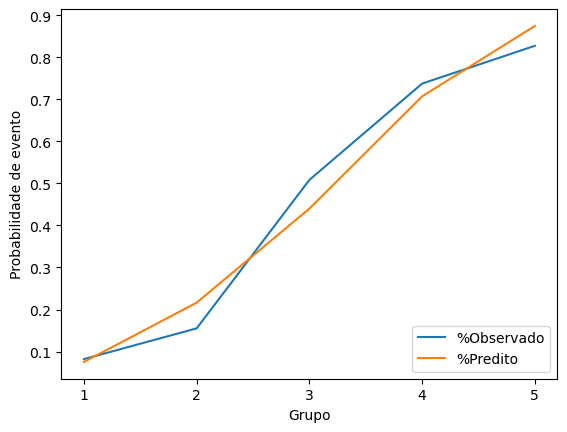

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['flag_doente'].plot(label='%Observado')
ax = qualid['predito'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [49]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.12%
KS: 58.52% 
AUC: 84.87% 
GINI: 69.74%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [52]:
reglog = smf.logit(" flag_doente ~ sex  + age  + C(cp) + exang + oldpeak + C(slope) + C(thal)  "
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.385022
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           11
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.4421
Time:                        18:52:28   Log-Likelihood:                -114.35
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 5.676e-33
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.8597      1.419     -4.833      0.000      -9.641      -4.078
C(cp)[T.2.0]        1.0541      0.722      1.460      0.144      -0.361       2.469
C(cp)[T.3.0]        0.2020      0.639      0.316      0.752      -1.050       1.454
C(cp)[T.4.0]        2.1901      0.622      3.521      0.000       0.971       3.409
C(slope)[T.2.0]     0.8914      0.407      2.192      0.028       0.094       1.688
C(slope)[T.3.0]    -0.1163      0.832     -0.140      0.889      -1.747       1.515
C(thal)[T.6.0]      0.3496      0.676      0.517      0.605      -0.975       1.674
C(thal)[T.7.0]      1.4690      0.373      3.935      0.000       0.737       2.201
sex                 1.2828      0.437      2.933      0.003       0.426       2.140
age                 0.0480      0.020      2.394      0.017       0.009       0.087
exang               0.7061      0.386      1.827      0.068      -0.051       1.464
oldpeak             0.5897      0.202      2.919      0.004       0.194       0.986
===================================================================================
"""

In [54]:
df['predito'] = reglog.predict(df)
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid['flag_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,flag_doente
predito,,,
"(0.00653, 0.0721]",60,0.037806,0.050000
"(0.0721, 0.242]",59,0.141620,0.152542
"(0.242, 0.612]",59,0.410694,0.389831
"(0.612, 0.894]",59,0.768829,0.762712
"(0.894, 0.991]",60,0.946403,0.950000


Text(0.5, 0, 'Grupo')

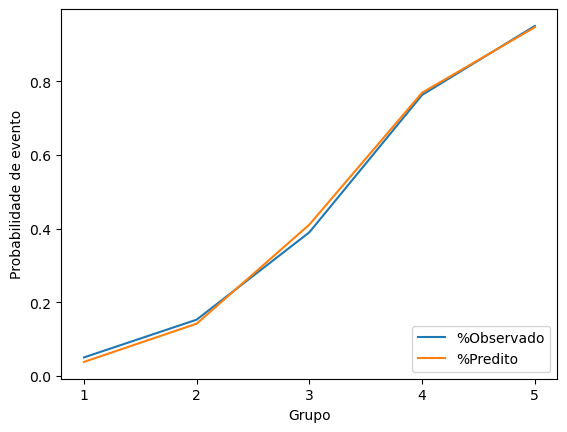

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['flag_doente'].plot(label='%Observado')
ax = qualid['predito'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [58]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 83.50%
KS: 69.47% 
AUC: 90.72% 
GINI: 81.44%
